In [15]:
!pip install open3d

In [16]:
import numpy as np
import open3d as o3d
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [37]:
point_cloud = np.load('apple_points3d.npy')
pts3d = point_cloud[:, :3]

In [ ]:
# # with open("/content/drive/MyDrive/apple_points3d.npy", "r") as f:
# point_cloud = np.load('apple_points3d.npy')

#     temp_pts = f.readlines()[3:]
# pts3d = np.array([x.split(" ")[1:4] for x in temp_pts], dtype=np.float32)
# rgb3d = np.array([x.split(" ")[4:7] for x in temp_pts], dtype=np.float32)/255

In [38]:
scaled_points = StandardScaler().fit_transform(pts3d)

In [40]:
model = DBSCAN(eps=0.15, min_samples=5)

In [ ]:
# # For Anaconda and others which allow OpenGL window for visualization
# labels = model.fit_predict(scaled_points)

# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(scaled_points)

# colors = labels + 1  # +1 to avoid assigning black color to noise points
# pcd.colors = o3d.utility.Vector3dVector(np.asarray(plt.get_cmap("tab20")(colors)[:, :3]))

# o3d.visualization.draw_geometries([pcd])

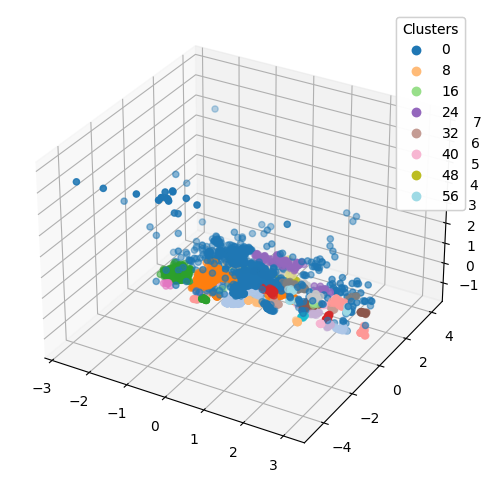

In [41]:
# For Colab
labels = model.fit_predict(scaled_points)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], c=labels, cmap='tab20')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()